In [2]:
#Math Part
import numpy as np
import pandas as pd

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time

def evol(output="sample_iot_result_n5.csv"):
    iot_data = pd.read_csv('sample_iot_data.csv')
    y = iot_data['pump'].values
    X = iot_data[['moisture','temp']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=10, ngen=500)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
String: 010011110001101011010111010010011100110100110000100110100001101101001110010111111110101001111111011001101101001010101110000111001101101110110100100001001111100111010000111100111101
 -> accuracy = 0.975, gates = 27.0
String: 110011111111111111011011111101000010111110010111110101010100000010110011001100111000000101001111010000001101000100011100011011111011001101111111011111011000111011110001101000010000
 -> accuracy = 0.9, gates = 29.0
String: 100101011100001100000100001101000100111101011101010011000000000001111010000100110110001111111011011000110101101011101000001011001001111110001111101011111100100010111001110111010001
 -> accuracy = 0.95, gates = 28.0
String: 011101011000011101011110101100000110111010110101001001101010110011100010011101010010111001110111110010101110001001100101001101101110111100101000011000101001111100001000011001001011
 -> accuracy = 0.95, gates = 22.0
String: 1110100010011001101001101000011001010101011011000000101110010000000101100000000111011101000000

d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
d:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 101011000101000101001010001110110010111010001001110011110001001101100101000101111001000110101100011000001011101100110010100101010101000100111111101111100011101110100011011011100111
 -> accuracy = 0.95, gates = 27.0
String: 111001011011110000001101001010011010001000111011110100010100110010101001011000111101010100010101000111001010000001011100011111110001010000011010010011111001010001001000110110111101
 -> accuracy = 0.95, gates = 20.0
String: 101111100101111110111111110010010010001110101001001001010111110001111011001001000011001010001101100010010010011010100010101111010011000010110010011111011110100101101101110000011101
 -> accuracy = 0.925, gates = 23.0
String: 111101000001011011001110001001011101100001101001011100111100101001100110111111010001000001111100101000011101110100111110101110010010110101111011101100001100100101001100011010111101
 -> accuracy = 0.95, gates = 22.0
String: 111001100000101000101000011011111110111111010001111111110010011111111100110101111000111010011010100

In [3]:
import encoding2 as e2
import random

iot_result = pd.read_csv('sample_iot_result_n5.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,40,1110010110111101010001011110101010110111100110...,1.666667,1.00
1,41,1110010110111101010001011110100100110111100110...,1.666667,1.00
2,42,1110010110111101010001011110101010110111100110...,1.666667,1.00
3,43,1110010110111101010001011110100100110111100110...,1.666667,1.00
4,44,1110010110111101010001011110100100110111100110...,1.666667,1.00
...,...,...,...,...
179,10,1100010110110101010001011110100100110111100110...,0.287083,0.85
180,11,1100110110110101010001011110100100110111100110...,0.287083,0.85
181,12,1100110110110101010001011110100100110111100110...,0.287083,0.85
182,13,1100110110110101010001011110100100110111100110...,0.287083,0.85


['11100', '10110', '11110', '10100', '01011', '11010', '10101', '10111', '10011', '01110', '01010', '11010', '11001', '11001', '11001', '10110', '11001', '11000', '10100', '11001', '10111', '11001', '01000', '11001', '01001', '11011', '10101', '01000', '01010', '01000', '01100', '10100', '01001', '11010', '11011', '11001']
5.0


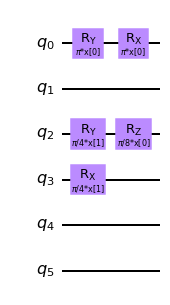

In [8]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer
# from qiskit.aqua import QuantumInstance
def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

import os
import psutil

class Fitness:

    def __init__(self, nqubits, nparameters, X, y, quantum_instance):
        self.nqubits = nqubits
        self.nparameters = nparameters
        self.cc = CircuitConversor(nqubits, nparameters)
        self.instance = quantum_instance
        self.X = X
        self.y = y

    def __call__(self, POP):
        try:
            return self.fitness(POP)
        except Exception as e:
            print(f'Exception happened during fitness():\n  {e}')
            process = psutil.Process(os.getpid())
            print(f'  RUSAGE_SELF: {process.memory_info()}')
        return 1000, 100000.0

    def fitness(self, POP):
        print('Invoked fitness')
        #Convertimos el individuo en el fenotipo (ansatz)
        fm, puertas = self.cc(coding_bits(POP))
        
cc = CircuitConversor(nqubits=6, nparameters=2)
fm, puertas = cc(coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')